In [14]:
from carto import city
from carto import area
from carto import tools

from enum import IntEnum
from shapely.geometry import mapping, Polygon, Point, LineString, MultiPolygon
from shapely import ops
import shapely
import numpy as np
import geopandas as gpd
import json
import matplotlib.pylab as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

%matplotlib inline


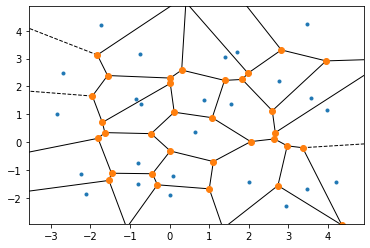

In [66]:

N = 5
radius = (N-2)
points = np.array([[x,y] for x in np.linspace(-1,1,N) for y in np.linspace(-1,1,N)])
#print(points)
points *= radius
points += np.random.random((len(points), 2)) * (radius / 2)
vor = Voronoi(points)
voronoi_plot_2d(vor);

In [82]:
regions = [r for r in vor.regions if -1 not in r and len(r) > 0]
print(regions)
regions = [Polygon([vor.vertices[i] for i in r]) for r in regions]

[[8, 3, 5, 2, 7], [13, 11, 10, 12], [23, 21, 20, 17, 18, 19, 22], [18, 3, 8, 9, 17], [19, 4, 5, 3, 18], [22, 0, 4, 19], [28, 24, 26, 25, 27], [28, 9, 8, 7, 6, 24], [28, 9, 17, 20, 1, 27], [30, 15, 11, 13, 23, 21, 29], [32, 29, 21, 20, 1, 31], [33, 25, 27, 1, 31], [39, 36, 35, 37, 38], [36, 32, 29, 30, 35], [37, 14, 15, 30, 35], [39, 34, 33, 31, 32, 36], [39, 34, 16, 38]]


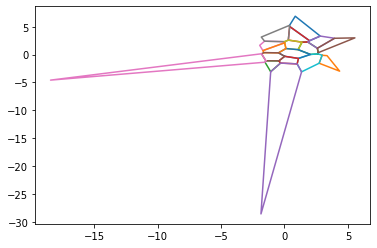

In [83]:
for r in regions:
    plt.plot(*r.exterior.xy)

In [84]:
zone = Polygon((2 * np.random.random((8,2)) - 1) * radius ).convex_hull.buffer(radius/1)
#zone = Polygon([(0,0), (1,-3), (2, 3)]).buffer(width/2)
regions = [r for r in regions if zone.contains(r) ]

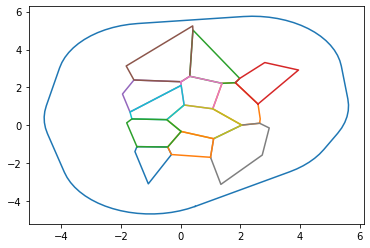

In [85]:
plt.plot(*zone.exterior.xy)
for r in regions:
    plt.plot(*r.exterior.xy)

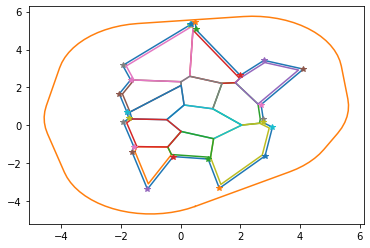

In [87]:
walls = MultiPolygon(regions).buffer(0.1, join_style=2) # 100 mètres entre les quartiers et les murs
plt.plot(*walls.exterior.xy)
plt.plot(*zone.exterior.xy)
for r in regions:
    plt.plot(*r.exterior.xy)
for tower in np.array(walls.exterior):
    plt.plot(*tower, '*')